In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit

from send_to_racing import bbox as bboxes
from send_to_racing import depth_values

(441,)
(441,)


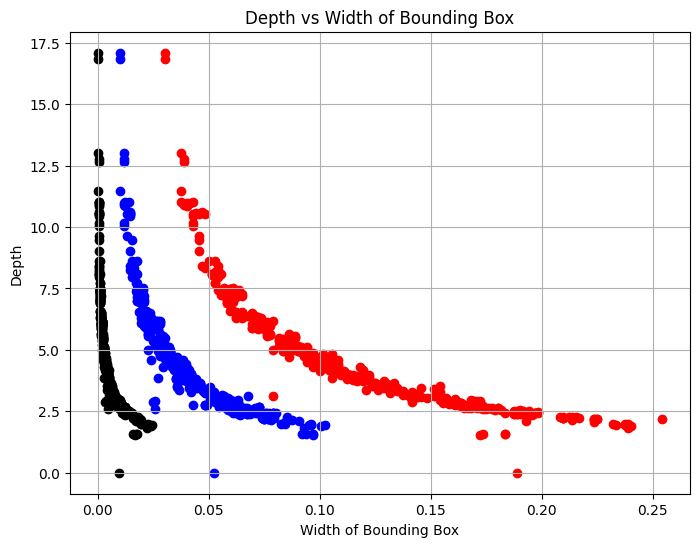

In [20]:
bboxes = np.array(bboxes)
depth_values = np.array(depth_values)

widths = bboxes[:,3]
heights = bboxes[:,4]
areas = widths * heights

plt.figure(figsize=(8, 6))
plt.scatter(widths, depth_values, color='blue')
plt.scatter(heights, depth_values, color='red')
plt.scatter(areas, depth_values, color='black')
plt.xlabel('Width of Bounding Box')
plt.ylabel('Depth')
plt.title('Depth vs Width of Bounding Box')
plt.grid(True)
plt.show()


In [53]:
x_train1,x_val1,y_train1,y_val1 = train_test_split(widths,depth_values,test_size=0.4)
x_train2,x_val2,y_train2,y_val2 = train_test_split(heights,depth_values,test_size=0.4)
x_train3,x_val3,y_train3,y_val3 = train_test_split(areas,depth_values,test_size=0.4)


In [15]:
def inv(x,A,B):
    return A + B/x

def inv_2(x,A,B,C):
    return  A + B/x + C/(x**2)

In [59]:
p,c = curve_fit(inv,x_train1,y_train1)

0.3315820167622225

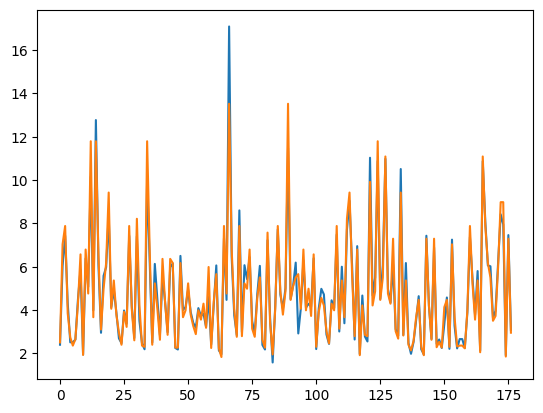

In [60]:
indices = list(range(len(widths)))
indices.sort(key=lambda x: widths[x])
'''
plt.plot(widths[indices], depth_values[indices], 'o')
plt.plot(widths[indices], inv(widths[indices], *p), linewidth=5)
'''
plt.plot(y_val1)
plt.plot(inv(x_val1,*p))
mse = np.mean((y_val1 - inv(x_val1, *p))**2)
mse

In [40]:
p1,c1 = curve_fit(inv_2,x_train1,y_train1)

0.3623214933352045

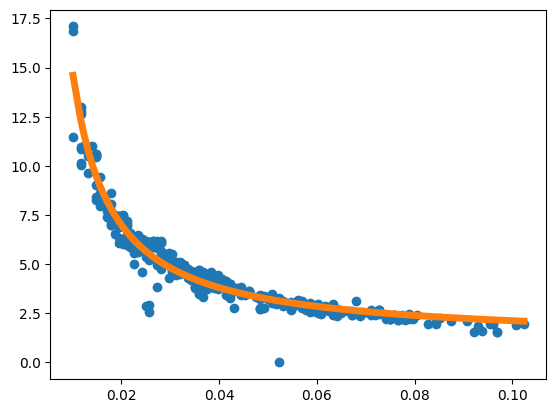

In [43]:
indices = list(range(len(widths)))
indices.sort(key=lambda x: widths[x])

plt.plot(widths[indices], depth_values[indices], 'o')
plt.plot(widths[indices], inv_2(widths[indices], *p1), linewidth=5)
mse = np.mean((y_val1 - inv_2(x_val1, *p1))**2)
mse

8.544640932797469


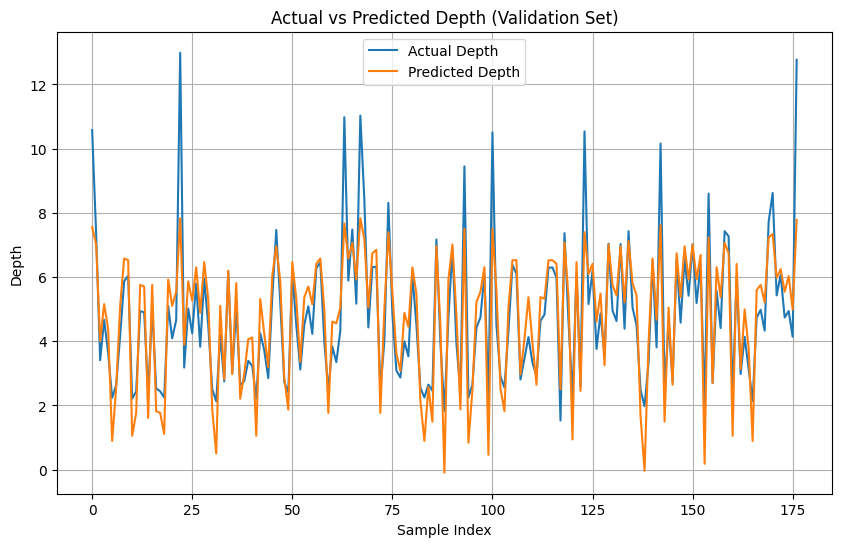

In [52]:
X = np.column_stack((widths, heights))
y = depth_values

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4)

# Define the model function for curve fitting
def model(X, A, B, C):
    w, h = X[:, 0], X[:, 1]  # Extract width and height
    return A + B * w + C * h

# Fit the model to the training data
p_opt, p_cov = curve_fit(model, X_train, y_train)

# Generate predictions using the fitted model
y_pred_val = model(X_val, *p_opt)

mse = np.mean((y_val1 - y_pred_val)**2)
print(mse)
# Plot the actual vs predicted values for the validation set
plt.figure(figsize=(10, 6))
plt.plot(y_val, label='Actual Depth')
plt.plot(y_pred_val, label='Predicted Depth')
plt.xlabel('Sample Index')
plt.ylabel('Depth')
plt.title('Actual vs Predicted Depth (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
p,c = curve_fit(inv,x_train2,y_train2)

0.12574256959004387

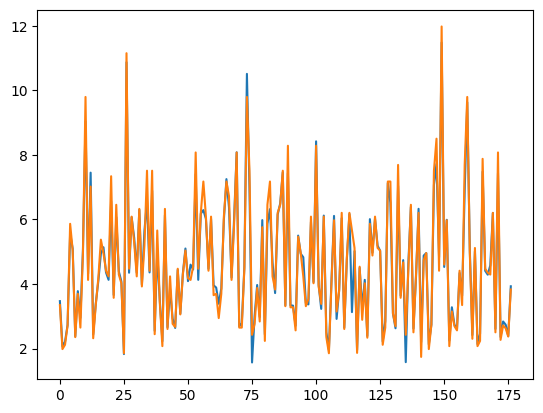

In [58]:
indices = list(range(len(widths)))
indices.sort(key=lambda x: widths[x])
'''
plt.plot(heights[indices], depth_values[indices], 'o')
plt.plot(heights[indices], inv(widths[indices], *p), linewidth=5)
'''
plt.plot(y_val2)
plt.plot(inv(x_val2, *p))
mse = np.mean((y_val2 - inv(x_val2, *p))**2)
mse

In [63]:
p1,c1 = curve_fit(inv_2,x_train2,y_train2)

0.11978238220407462

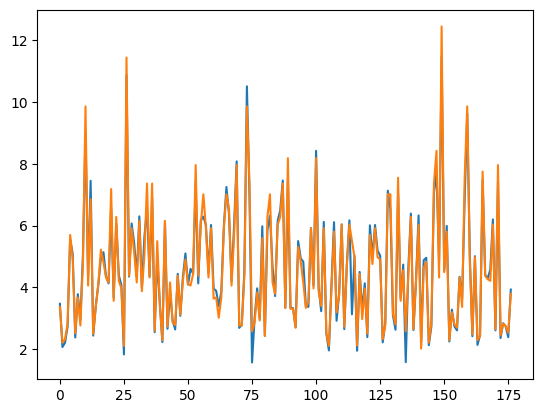

In [64]:
indices = list(range(len(widths)))
indices.sort(key=lambda x: widths[x])
'''
plt.plot(heights[indices], depth_values[indices], 'o')
plt.plot(heights[indices], inv(widths[indices], *p), linewidth=5)
'''
plt.plot(y_val2)
plt.plot(inv_2(x_val2, *p1))
mse = np.mean((y_val2 - inv_2(x_val2, *p1))**2)
mse